# Analysis of Restaurant Data
## Goals
- To identify the top 50 restraunts within this dataset
- To see which locations/countries have the best rated restaurants
- To see what are the most common cuisines offered
- To see what are the most common payment methods
- Reviewer demographic breakdown & preference analysis
    - What kind of restaurants do the different drinking types go to?
    - Do reviewers of certain age ranges have a tendency to rate a restaurant differently?
    - Does a reviewer's budget level influence the ratings of restraunts? 
    - How much influence does a reviewer's interest have on their choice of restraunt?
    - To what extend does a reviewer's marital status affect which restraunts they go to?

## List of CSVs
### Restaurants
1. chefmozaccepts.csv
2. chefmozcuisine.csv
3. chefmozhours4.csv
4. chefmozparking.csv
5. geoplaces2.csv

### Consumers
6. usercuisine.csv
7. userpayment.csv
8. userprofile.csv

### User-Item-Rating
9. rating_final.csv

# Find the Top 50 Restaurants
We'll use the `rating_final.csv` for user ratings, and the `geoplaces2.csv` for restaurant information. 

In [1]:
import pandas as pd
import numpy as np
import pprint
import seaborn as sns

In [2]:

rating_final_df = pd.read_csv('./data/rating_final.csv')
print(rating_final_df.dtypes)

userID            object
placeID            int64
rating             int64
food_rating        int64
service_rating     int64
dtype: object


In [3]:
geoplaces2_df = pd.read_csv('./data/geoplaces2.csv')
print(geoplaces2_df.dtypes)

placeID             int64
latitude          float64
longitude         float64
the_geom_meter     object
name               object
address            object
city               object
state              object
country            object
fax                object
zip                object
alcohol            object
smoking_area       object
dress_code         object
accessibility      object
price              object
url                object
Rambience          object
franchise          object
area               object
other_services     object
dtype: object


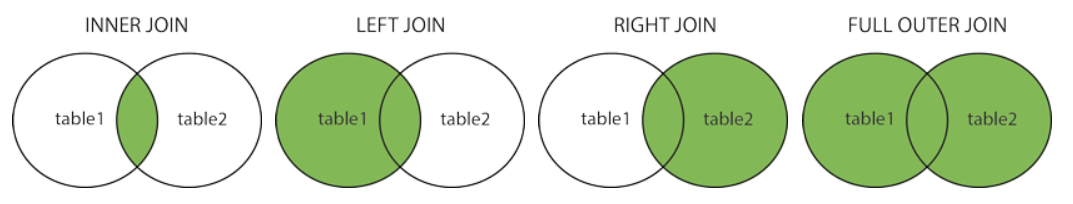

In [4]:
df = rating_final_df.merge(
    geoplaces2_df, 
    on=('placeID'), 
    how='inner', 
    suffixes=('_rating', '_geo' ))
df.head()

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,the_geom_meter,name,address,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,U1077,135085,2,2,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
1,U1108,135085,1,2,1,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
2,U1081,135085,1,2,1,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
3,U1056,135085,2,2,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
4,U1134,135085,2,1,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none


In [5]:
df.shape #prints the shape of the dataframe

(1161, 25)

In [6]:
df.drop(['the_geom_meter', 'url', 'address', 'zip', 'fax'], axis = 1, inplace = True)

In [7]:
df.head()

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,name,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services
0,U1077,135085,2,2,2,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
1,U1108,135085,1,2,1,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
2,U1081,135085,1,2,1,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
3,U1056,135085,2,2,2,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
4,U1134,135085,2,1,2,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none


Since `rating`, `food_rating` and `service_rating` are based on a 2 point scale, we'll re-scale it to 5 so that the aggregated ratings will be out of 5.00 and make it easier for users of the visualization.

In [8]:
df['rating'] = df['rating'] * (5/2)
df['food_rating'] = df['food_rating'] * (5/2)
df['service_rating'] = df['service_rating'] * (5/2)
df.head()

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,name,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services
0,U1077,135085,4,4,4,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
1,U1108,135085,2,4,2,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
2,U1081,135085,2,4,2,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
3,U1056,135085,4,4,4,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
4,U1134,135085,4,2,4,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none


In [9]:
#Check how lopsided each column is
df.country.unique()

array(['Mexico', 'mexico', '?'], dtype=object)

In [10]:
df.state.unique()

array(['SLP', 's.l.p.', '?', 'Tamaulipas', 'tamaulipas', 'Morelos',
       'San Luis Potosi', 'morelos', 'S.L.P.', 'san luis potosi', 'slp',
       'mexico', 'san luis potos'], dtype=object)

## Sorting by the different ratings
In order to figure out which is the most favourite by users, we have to sort the restraunts by the means of `rating`, `food_rating`, and `service_rating` columns.

First, we prepare dataframe to show ratings.
We re-order the column names, removing those that will be aggregated, and then use this list of columns as a basis to group our dataframe

In [11]:
columns = list(df)
columns = [i for i in columns if i not in (
    'placeID',
    'userID',
    'food_rating',
    'service_rating',
    'rating')]
columns.insert(0, 'placeID')

In [12]:
agg_groupby = df.groupby(columns, as_index=False).agg({
    'userID': 'count',
    'rating': 'mean',
    'food_rating': 'mean',
    'service_rating': 'mean',
}).rename(index=str, columns={
    'userID': 'userID_count',
    'rating': 'rating_mean',
    'food_rating': 'food_rating_mean',
    'service_rating': 'service_rating_mean'})
agg_groupby

,placeID,latitude,longitude,name,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,rating_mean,userID_count,service_rating_mean,food_rating_mean
0,132560,23.752304,-99.166913,puesto de gorditas,victoria,tamaulipas,mexico,No_Alcohol_Served,permitted,informal,no_accessibility,low,familiar,f,open,none,1.000000,4,0.500000,2.000000
1,132561,23.726819,-99.126506,cafe ambar,?,?,?,No_Alcohol_Served,none,informal,completely,low,familiar,f,closed,none,1.500000,4,2.000000,2.000000
2,132564,23.730925,-99.145185,churchs,?,?,?,No_Alcohol_Served,none,informal,completely,low,familiar,f,closed,none,2.500000,4,3.000000,2.500000
3,132572,22.141647,-100.992712,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,No_Alcohol_Served,not permitted,informal,completely,low,familiar,f,closed,none,2.000000,15,1.866667,2.000000
4,132583,18.922290,-99.234332,McDonalds Centro,Cuernavaca,Morelos,Mexico,No_Alcohol_Served,not permitted,informal,partially,low,familiar,t,closed,none,2.000000,4,2.500000,2.000000
5,132584,23.752365,-99.165288,Gorditas Dona Tota,?,?,?,No_Alcohol_Served,not permitted,informal,completely,medium,familiar,t,closed,none,2.666667,6,2.000000,3.000000
6,132594,23.752168,-99.165709,tacos de barbacoa enfrente del Tec,?,?,?,No_Alcohol_Served,not permitted,informal,completely,low,familiar,f,open,none,1.200000,5,1.200000,2.400000
7,132608,23.758805,-99.165130,Hamburguesas La perica,victoria,Tamaulipas,Mexico,No_Alcohol_Served,permitted,informal,completely,low,quiet,t,open,none,2.000000,6,1.666667,2.333333
8,132609,23.760268,-99.165865,Pollo_Frito_Buenos_Aires,victoria,Tamaulipas,Mexico,No_Alcohol_Served,not permitted,informal,completely,low,quiet,t,closed,none,1.200000,5,1.200000,1.200000
9,132613,23.752903,-99.165076,carnitas_mata,victoria,Tamaulipas,Mexico,No_Alcohol_Served,permitted,informal,completely,medium,familiar,t,closed,none,2.333333,6,2.000000,2.666667


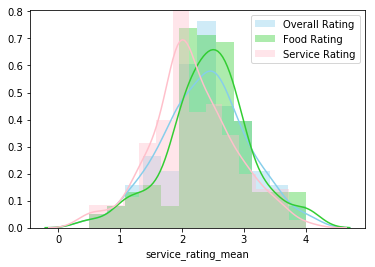

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot( agg_groupby["rating_mean"] , color="skyblue", label="Overall Rating")
sns.distplot( agg_groupby["food_rating_mean"] , color="limegreen", label="Food Rating")
sns.distplot( agg_groupby["service_rating_mean"] , color="pink", label="Service Rating")
plt.legend()
plt.show()

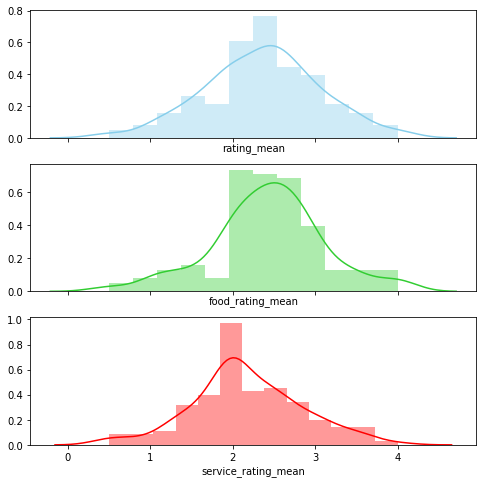

In [20]:
import seaborn as sns
f, axes = plt.subplots(3,1, figsize=(8,8), sharex=True)
sns.distplot( agg_groupby["rating_mean"] , color="skyblue", ax=axes[0])
sns.distplot( agg_groupby["food_rating_mean"] , color="limegreen", ax=axes[1])
sns.distplot( agg_groupby["service_rating_mean"] , color="red", ax=axes[2])
plt.show()

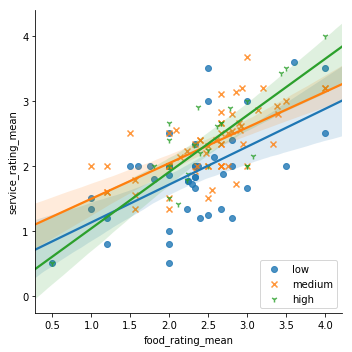

In [21]:
sns.lmplot( x="food_rating_mean", y="service_rating_mean", data=agg_groupby, \
           fit_reg=True, hue='price', legend=False, \
          markers=["o", "x", "1"])
plt.legend(loc='lower right')

plt.show()

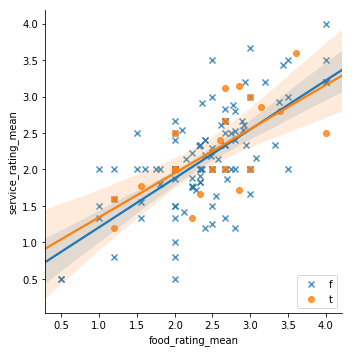

In [22]:
sns.lmplot( x="food_rating_mean", y="service_rating_mean", data=agg_groupby, \
           fit_reg=True, hue='franchise', legend=False, \
          markers=["x", "o"])
plt.legend(loc='lower right')

plt.show()

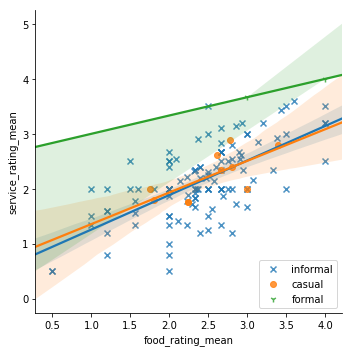

In [23]:
sns.lmplot( x="food_rating_mean", y="service_rating_mean", data=agg_groupby, \
           fit_reg=True, hue='dress_code', legend=False, \
          markers=["x", "o", "1"])
plt.legend(loc='lower right')

plt.show()

## Visualizing the Top 20 Restaurants by Overall Ratings
We prepare a map to visualize where exactly our top 20 restaurants are located.

For this, we will be using the folium python package.

In [24]:
# We create the dataframe with the overall ratings, with the rating_mean descending
by_overall = agg_groupby.sort_values(['rating_mean'], ascending=False)
by_overall.head(n=5)

,placeID,latitude,longitude,name,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,rating_mean,userID_count,service_rating_mean,food_rating_mean
57,132955,22.147622,-101.010275,emilianos,san luis potos,mexico,?,Wine-Beer,none,informal,completely,low,familiar,t,closed,variety,4.000000,5,3.600000,3.6
82,135034,22.140517,-101.021422,Michiko Restaurant Japones,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none,4.000000,5,3.200000,4.0
62,134986,18.928798,-99.239513,Restaurant Las Mananitas,Cuernavaca,Morelos,Mexico,Wine-Beer,none,formal,no_accessibility,high,familiar,f,closed,none,4.000000,8,4.000000,4.0
52,132922,22.151135,-100.982311,cafe punta del cielo,?,?,?,No_Alcohol_Served,permitted,formal,completely,medium,familiar,f,closed,none,3.666667,6,3.666667,3.0
26,132755,22.153324,-101.019546,La Estrella de Dimas,San Luis Potosi,S.L.P.,Mexico,No_Alcohol_Served,none,informal,partially,medium,familiar,f,closed,variety,3.600000,5,3.200000,4.0


In [25]:
import folium

In [26]:
#list of lat longs
by_overall_20 = by_overall.head(n=20)
by_overall_20_lat_long = by_overall_20[['latitude','longitude']]
by_overall_20_lat_long_arr = by_overall_20_lat_long.values
by_overall_20_lat_long_list = by_overall_20_lat_long_arr.tolist()
by_overall_20_lat_long_list

[[22.147622, -101.01027490000001],
 [22.140517000000003, -101.021422],
 [18.928798, -99.239513],
 [22.1511348, -100.9823115],
 [22.153323999999998, -101.0195459],
 [18.917441, -99.165945],
 [18.916654, -99.22711],
 [22.149689000000002, -100.999525],
 [22.148854, -101.008472],
 [22.139573000000002, -100.991564],
 [22.14955, -100.97797],
 [22.145108, -100.989547],
 [18.940828, -99.21542600000001],
 [22.1449787, -101.0056829],
 [18.9257734, -99.2326355],
 [18.915421, -99.184871],
 [22.147879999999997, -100.98947199999999],
 [18.923429000000002, -99.216413],
 [22.146658, -100.987219],
 [22.147175, -100.97426899999999]]

In [27]:

# We first define the folium map
overall_ratings_map = folium.Map();

overall_ratings_map.fit_bounds(bounds=by_overall_20_lat_long_list)

# We define a function to add our marker to the map
def add_marker(lat,long,map, label=None, color=None):
    """Adds a marker to the specified map"""
    folium.Marker([lat,long],
                 popup=label,
                 icon=folium.Icon(color=color, icon='heart')).add_to(map)

# Let's see what this map looks like so far
overall_ratings_map

Ok it doesn't really look like much, but we're going to add the markers to it now!

Let's loop over the 20 restaurants ranked by overall rating to visualize their locations!
We add a marker to the map for each restaurant.
We also add a clickable label for each marker, and add an appropriate description to each.

In [28]:
by_overall_top_5 = by_overall.head(n=5)['placeID'].tolist()
by_overall_top_10 = by_overall.head(n=10)['placeID'].tolist()
by_overall_6_to_10 = [x for x in by_overall_top_10 if (x not in by_overall_top_5)]
by_overall_6_to_10 

[135013, 134976, 135074, 135055, 135075]

In [29]:
for index, row in by_overall_20.iterrows():
    rating = '%.2f' % row['rating_mean'] #format to 2dp
    if row['placeID'] in by_overall_top_5:
        add_marker(row['latitude'], row['longitude'],overall_ratings_map, 
                   label='<b>{}</b><br>rating: {} / 5<br>{}'.format(row['name'], rating, 'Top 5'),
                  color='lightblue')
    elif row['placeID'] in by_overall_top_10:
        add_marker(row['latitude'], row['longitude'],overall_ratings_map, 
               label='<b>{}</b><br>rating: {} / 5<br>{}'.format(row['name'], rating, 'Top 10'),
                  color='blue')
    else:
        add_marker(row['latitude'], row['longitude'],overall_ratings_map, 
               label='<b>{}</b><br>rating: {} / 5<br>{}'.format(row['name'], rating, 'Top 20'),
                color='darkblue')
overall_ratings_map

# Visualizing the Top 20 Restaurants by Food Rating
We sort the restraunts now by `food_rating_mean`, but we also use `rating_mean` as a secondary sort key to ensure that restaurants with the same `food_rating_mean` will be appropriately ranked.

In [ ]:
by_food = agg_groupby.sort_values(['food_rating_mean', 'rating_mean'], ascending=False)
by_food.head(n=5)

In [ ]:
cuisine_df = pd.read_csv('./data/chefmozcuisine.csv') # placeID is not unique
cuisine_df.head(n=10)

In [ ]:
cuisine_top_5 = cuisine_df.groupby('Rcuisine', as_index=False)\
        .agg('count')\
        .rename(columns={'placeID': 'counts', 'Rcuisine':'cuisine'})\
        .sort_values('counts', ascending=0)\
        .head(n=5)\
        .reset_index()
        
cuisine_top_5

In [ ]:
cuisine_top_5 = cuisine_top_5.drop(['index'], axis=1)
cuisine_top_5

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

height = tuple(cuisine_top_5.counts)
bars = tuple(cuisine_top_5.cuisine)
y_pos = np.arange(len(bars))

plt.bar(y_pos,height)
plt.xticks(y_pos, bars, )
plt.yticks()
plt.show()


In [ ]:
gb = cuisine_df.groupby('placeID').apply(lambda x: ', '.join(x['Rcuisine']))
gb

In [ ]:
df=gb.to_frame()
df=df.reset_index()
df.head()

In [ ]:
df = df.rename(columns={0: "cuisines"})
df.head()

In [ ]:

l = df.cuisines.tolist()
text = ' '.join(l)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=480, height=480, margin=0, max_words=20, max_font_size=70, min_font_size=10).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [ ]:
by_service = agg_groupby.sort_values(['service_rating_mean', 'rating_mean'], ascending=False)
by_service.head(n=5)